In [20]:
#Import Needed Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("D:\Programmes\Python\DataSets\drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [7]:
df.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [8]:
info= df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
data_type = df.dtypes
data_type

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [10]:
null = df.isnull().sum()
null

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

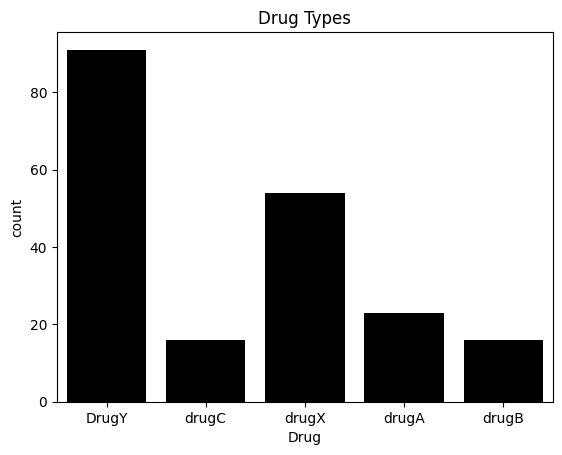

In [14]:
sns.countplot(x=df['Drug'],color='black')
plt.title('Drug Types');

In [16]:
#preprocessing

X=df.drop(columns='Drug')
y=df['Drug']

In [17]:
X=pd.get_dummies(X,dtype=float,drop_first=True)
X

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0.0,0.0,0.0,0.0
1,47,13.093,1.0,1.0,0.0,0.0
2,47,10.114,1.0,1.0,0.0,0.0
3,28,7.798,0.0,0.0,1.0,0.0
4,61,18.043,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
195,56,11.567,0.0,1.0,0.0,0.0
196,16,12.006,1.0,1.0,0.0,0.0
197,52,9.894,1.0,0.0,1.0,0.0
198,23,14.020,1.0,0.0,1.0,1.0


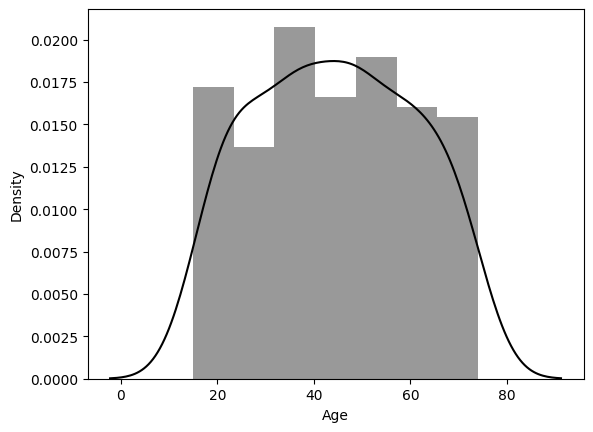

In [22]:
sns.distplot(df['Age'],color='black');

<Axes: xlabel='Na_to_K', ylabel='Density'>

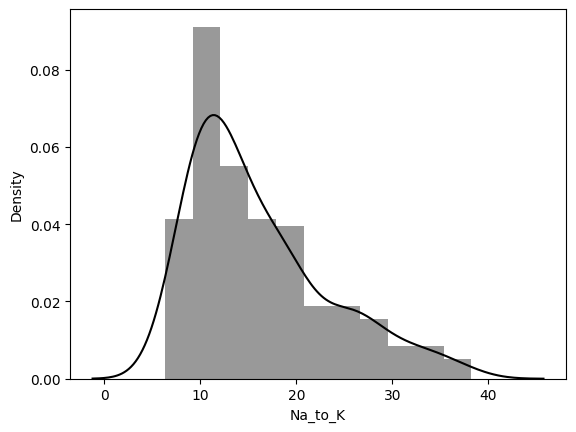

In [24]:
sns.distplot(df['Na_to_K'],color='black')

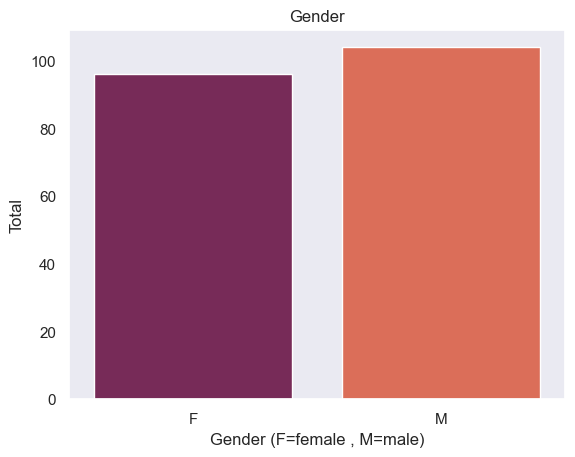

In [25]:
sns.set_theme(style="dark")
sns.countplot(data=df ,x= df['Sex'] , palette='rocket')
plt.xlabel('Gender (F=female , M=male)')
plt.ylabel('Total')
plt.title('Gender');

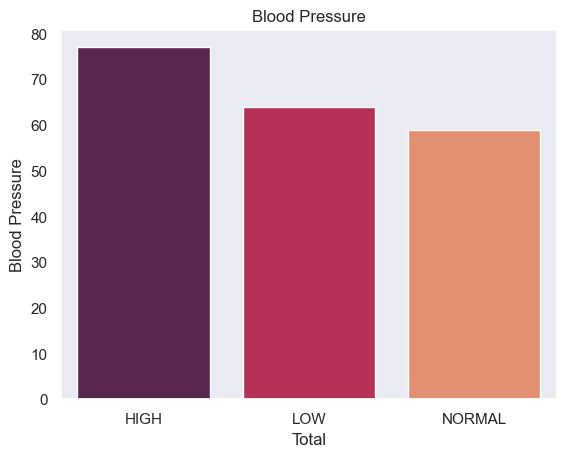

In [26]:
sns.countplot( data=df, x=df['BP'], palette="rocket")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.title('Blood Pressure');

In [27]:
#splitting the data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 ,random_state=42)


In [28]:
RF_model = RandomForestClassifier(n_estimators= 100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [29]:
RF_model.score(X_train , y_train)

1.0

In [30]:
RF_pred = RF_model.predict(X_test)


In [31]:
RF_acc = accuracy_score(y_test , RF_pred)

In [32]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [33]:
cm1 = confusion_matrix(y_test,RF_pred)

Text(92.25, 0.5, 'Truh')

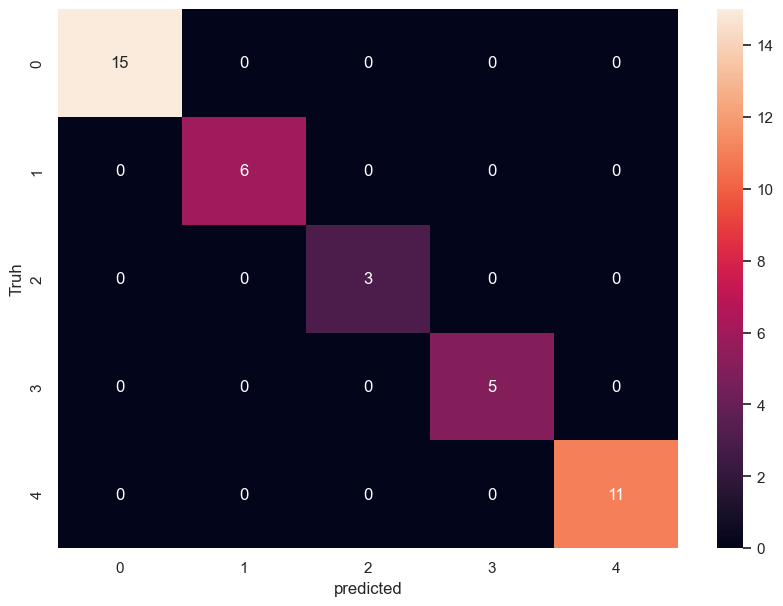

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

In [36]:
from sklearn import svm
svc = svm.SVC(kernel='linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [37]:
svc.score(X_train , y_train)

1.0

In [38]:
 svc_pred = svc.predict(X_test)


In [39]:
svc_acc = accuracy_score(y_test , svc_pred)


In [40]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [41]:
cm2 = confusion_matrix(y_test,svc_pred)

Text(92.25, 0.5, 'Truh')

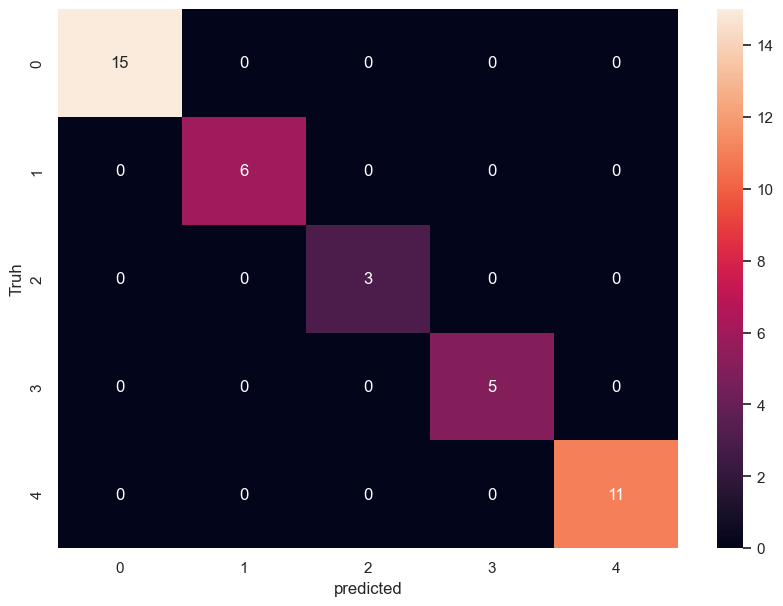

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [44]:
dt.score(X_train , y_train)


1.0

In [45]:
dt_pred = dt.predict(X_test)

In [46]:
DT_acc=accuracy_score(y_test , dt_pred)
DT_acc


1.0

In [47]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [48]:
cm3 = confusion_matrix(y_test,dt_pred)

Text(92.25, 0.5, 'Truth')

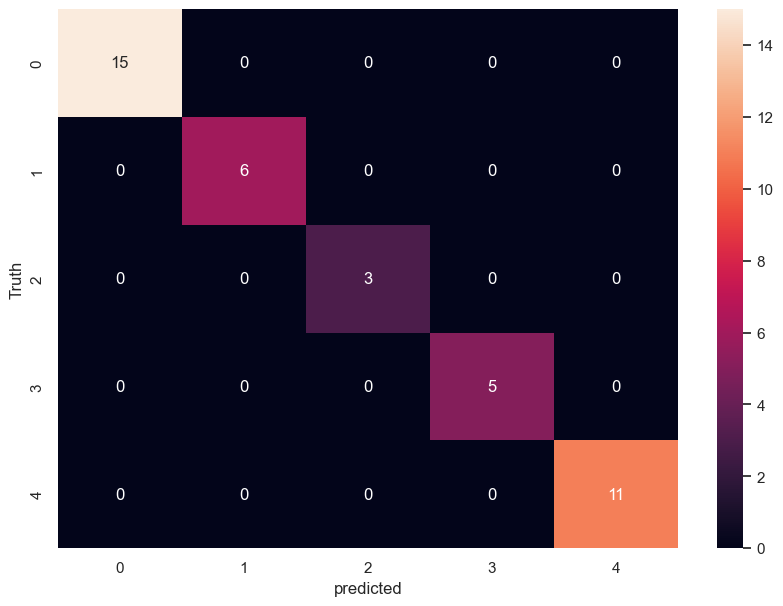

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')


In [50]:
models=pd.DataFrame({
'models':['Random_forest','SVC','Decision_Tree'],
'scores':[RF_acc,svc_acc,DT_acc]})
models.sort_values(by='scores',ascending=False)

,models,scores
0,Random_forest,1.0
1,SVC,1.0
2,Decsion_Treee,1.0
